## In this notebook I'm going to try use Decision Tree's

The idea here is that I'm going to use a simple decision tree model to try to determine what flower species it is given a couple of columns that represent the species characteristics

With a decision Tree we need to define some things up front, our features/variables/arguments which are basically describing what values our category (Species) has, so we are going to try and see can we determine the correct species using just a few values and with what level of accuracy we can make such predictions.

In [205]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor #specify the model

#iris_df is the dataframe storing the full iris dataset
iris_df = pd.read_csv('..\iris-flower-dataset\IRIS.csv')

y = iris_df['species']

#Features, these are my columns of interest that I think will factor into determining flower species
feature_names = ['petal_width', 'petal_length', 'sepal_width', 'sepal_length']

#X is a dataframe of just the columns from feature_names
X = iris_df[feature_names]

#for getting my y we can't use categorical values like a named species, but we can convert this to a number equivalent
cat_conversion = {'Iris-setosa': 0, "Iris-versicolor":1, "Iris-virginica":2}

y.replace(cat_conversion, inplace=True)

#define iris_model object from DecisionTreeRegressor, using random_state=0 as it makes the result consistent
iris_model = DecisionTreeRegressor(random_state=0)

iris_model.fit(X,y)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

By this point we've:
- Loaded in our dataset
- Defined our y which is the Species, this is the value we want to determine from our features
- Defined our features for which I'm using all remaining columns
- I convert the the Species to numeric equivalents as the model can't work with strings
- I define a Decision Tree Regressor Object
- Fit the model

In [206]:
predictions = iris_model.predict(X)
print(predictions)
print(y)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y, predictions)
print(mae)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
14

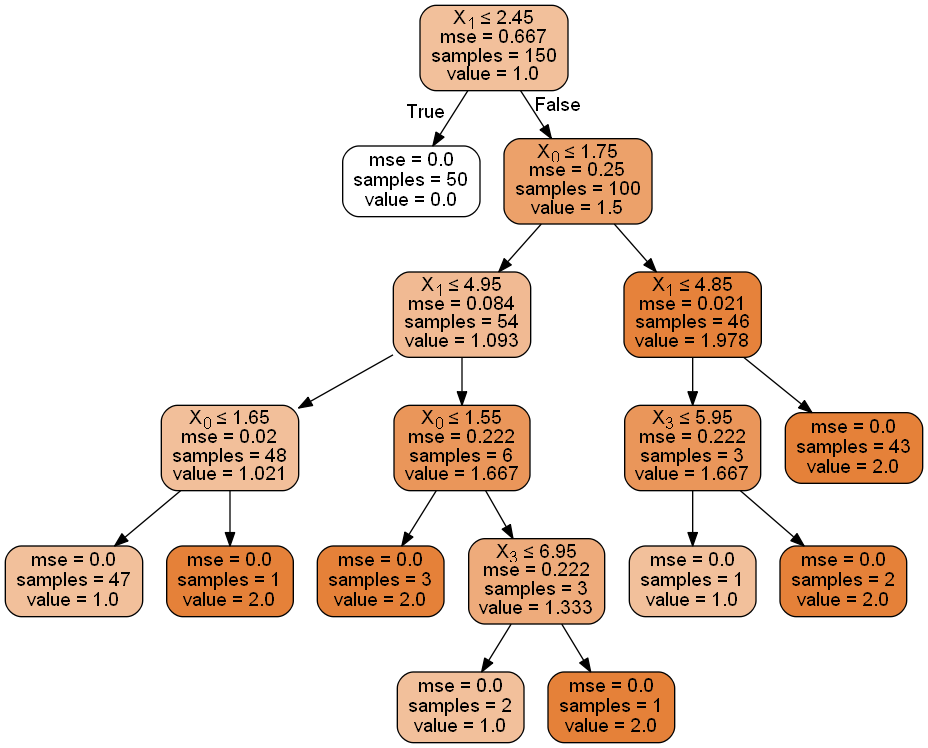

In [207]:
#Using graphviz to visualise the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(iris_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

So far I've got mean absolute error fo 0 which is great but actually is meaningless because I haven't broken up my data yet into two groups.
Next I'm going to try to validate my model, to do this I will split my data into training and validation groups, the training data will go into the model, the validating data will be left to the side to later act as a test for how accurate our model is.

In [159]:
from sklearn.model_selection import train_test_split

# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeRegressor(random_state=0)
# Fit model
iris_model.fit(train_X, train_y)

# get predicted category on validation data
val_predictions = iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [160]:
#compare whether the two are returning the same values at each index, this is to visually show whether we've matches or not
for i in range(len(val_y)):
    if val_y.iloc[i] == val_predictions[i]:
        print("TRUE")
    else:
        print("FALSE")

TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE


In [161]:
#get the mean absolute error like before
print(mean_absolute_error(val_y, val_predictions))

0.02631578947368421


In [162]:
#get the mean absolute error like before
print(mean_absolute_error(val_y, val_predictions))

0.02631578947368421


I'm going to add a function next to take in our training and validating data and also use a max_leaf_node argument

In [163]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Going to use this function then to try determine the max amount of leaf nodes to have in my decision tree model

In [164]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_mae_dict = {}
for i in candidate_max_leaf_nodes:
    test = get_mae(i, train_X, val_X, train_y, val_y)
    leaf_mae_dict[i] = test
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_leaf_node_count = int(min(leaf_mae_dict, key=leaf_mae_dict.get))
print(best_leaf_node_count)
best_tree_size = best_leaf_node_count

25


So it look's like 25 is the best number of nodes, and printing all the mean absolute error for the different nodes shows us that it doesn't improve accuracy after 25

In [165]:
print(leaf_mae_dict)

{5: 0.029689608636977047, 25: 0.02631578947368421, 50: 0.02631578947368421, 100: 0.02631578947368421, 250: 0.02631578947368421, 500: 0.02631578947368421}


We can probably do better than 25, so I'm going to go from 4-10 in this next cell

In [172]:
candidate_max_leaf_nodes = [4,5,6, 7, 8, 9,10]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
leaf_mae_dict = {}
for i in candidate_max_leaf_nodes:
    test = get_mae(i, train_X, val_X, train_y, val_y)
    leaf_mae_dict[i] = test
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_leaf_node_count = int(min(leaf_mae_dict, key=leaf_mae_dict.get))
print(best_leaf_node_count)
best_tree_size = best_leaf_node_count
print(leaf_mae_dict)

6
{4: 0.049426450742240204, 5: 0.029689608636977047, 6: 0.02631578947368421, 7: 0.02631578947368421, 8: 0.02631578947368421, 9: 0.02631578947368421, 10: 0.02631578947368421}


So now we know that 6 is the most efficient number of nodes to pick if we hant the highest accuracy for our decision tree model.
I'm going to reapply this max nodes and redo my model, this time I will also save it to an image

In [201]:
# Supplying a numeric value to the random_state argument guarantees we get the same split every time this script is ran.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)
# Define model
iris_model = DecisionTreeRegressor(random_state=0, max_leaf_nodes=7)
# Fit model
iris_model.fit(train_X, train_y)

# get predicted category on validation data
val_predictions = iris_model.predict(val_X)
#print the predicted values for Y
print(val_predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0. 2. 1. 0. 2. 2. 1. 0. 2.]


In [202]:
#get the mean absolute error like before
print(mean_absolute_error(val_y, val_predictions))

0.02631578947368421


In [203]:
#This is a weird 'hack' to get the correct path environment when using conda for graphviz

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

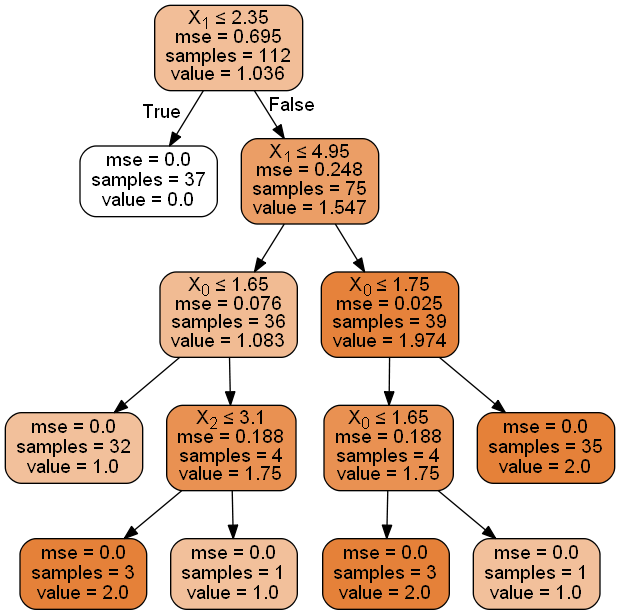

In [204]:
#Using graphviz to visualise the decision tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(iris_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())